In [ ]:
import numpy as np 
import os 
utils_data_pt = './utils_data/1stage_ourModel_twitch-e_True'
loss_list = np.load(os.path.join(utils_data_pt, 'loss.npy'))
# acc_list = np.load(os.path.join(utils_data_pt, 'acc.npy'))
val_acc_list = np.load(os.path.join(utils_data_pt, 'val_acc.npy'))
add_num_list = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
pseudo_loss_list = np.load(os.path.join(utils_data_pt, 'pseudo_loss.npy'))
final_acc = np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))
pseudolabel_num = np.load(os.path.join(utils_data_pt, 'pseudolabel_num.npy'))
print(f'Final_accuracy:{final_acc[0]}')

In [ ]:
import matplotlib.pyplot as plt
lines = []
fig, ax1 = plt.subplots()
lines.append(ax1.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')[0])
lines.append(ax1.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')[0])
lines.append(ax1.plot(np.arange(len(pseudo_loss_list)), pseudo_loss_list, label='pseudo_loss')[0])
# ax1.legend()

# ax2 = ax1.twinx()
# lines.append(ax2.plot(np.arange(len(pseudolabel_num)), pseudolabel_num, label='pseudolabel_num', color='black')[0])
# ax2.legend()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

In [ ]:
fig, ax1 = plt.subplots()
lines.append(ax1.plot(np.arange(len(loss_list)), val_acc_list, label='val_acc')[0])
lines.append(ax1.plot(np.arange(len(acc_list)), acc_list, label='accuracy')[0])
ax1.legend()

In [31]:
import matplotlib.pyplot as plt
import numpy as np 
import os 

utils_data_pt = './utils_data/1_stage_ourModel_twitch-e_True'
loss_list = np.load(os.path.join(utils_data_pt, 'loss.npy'))
metric_list = np.load(os.path.join(utils_data_pt, 'metric.npy'))
val_metric_list = np.load(os.path.join(utils_data_pt, 'val_metric.npy'))
add_num_list = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
test_metric_list = np.load(os.path.join(utils_data_pt, 'test_metric.npy'))
pseudo_loss_list = np.load(os.path.join(utils_data_pt, 'pseudo_loss.npy'))
final_acc = np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))
pseudolabel_num = np.load(os.path.join(utils_data_pt, 'pseudolabel_num.npy'))
threshold_accuracy_list = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
print(f'Final metric:{final_acc[0]}')

Final metric:0.7016878401280693


In [20]:
utils_data_pt = './utils_data/2_stage_ourModel_twitch-e_True'
threshold_accuracy_list_2 = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_2 = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

utils_data_pt = './utils_data/3_stage_inherit_ourModel_twitch-e_True'
threshold_accuracy_list_3_inherit = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_3_inherit = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

utils_data_pt = './utils_data/3_stage_non-inherit_ourModel_twitch-e_True'
threshold_accuracy_list_3_non_inherit = np.load(os.path.join(utils_data_pt, 'threshold_accuracy.npy'))
add_num_list_3_non_inherit = np.load(os.path.join(utils_data_pt, 'add_num.npy'))
print(f"{np.load(os.path.join(utils_data_pt, 'final_accuracy.npy'))[0]}")

0.6965204274341283
0.6983351890854943
0.7009436760587104


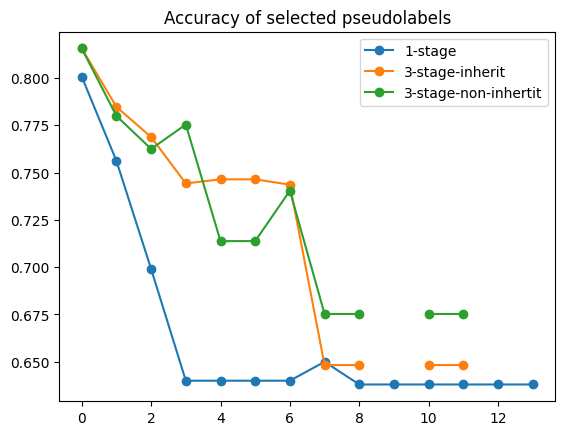

In [44]:
plt.title('Accuracy of selected pseudolabels')
plt.plot(np.arange(len(threshold_accuracy_list)), threshold_accuracy_list, 'o-', label='1-stage')
# plt.plot(np.arange(len(threshold_accuracy_list_2)), threshold_accuracy_list_2, 'o-', label='2-stage')
plt.plot(np.arange(len(threshold_accuracy_list_3_inherit)), threshold_accuracy_list_3_inherit, 'o-', label='3-stage-inherit')
plt.plot(np.arange(len(threshold_accuracy_list_3_non_inherit)), threshold_accuracy_list_3_non_inherit, 'o-', label='3-stage-non-inhertit')
plt.legend()

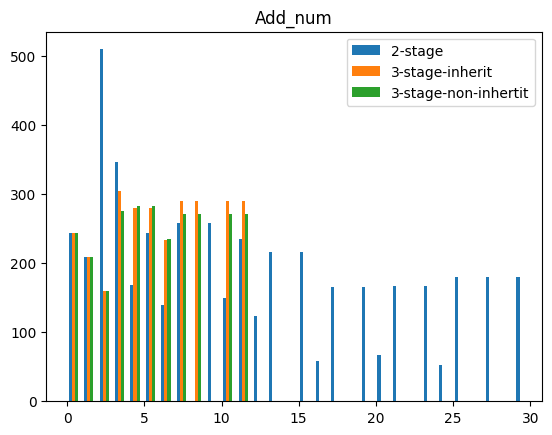

In [40]:
plt.title('Add_num')
width = 0.2
# plt.bar(np.arange(len(add_num_list[1:])), add_num_list[1:], width=width, label='1-stage')
plt.bar(np.arange(len(add_num_list_2[1:]))+width, add_num_list_2[1:], width=width, label='2-stage')
plt.bar(np.arange(len(add_num_list_3_inherit[1:]))+2*width, add_num_list_3_inherit[1:], width=width, label='3-stage-inherit')
plt.bar(np.arange(len(add_num_list_3_non_inherit[1:]))+3*width, add_num_list_3_non_inherit[1:], width=width, label='3-stage-non-inhertit')
plt.legend()

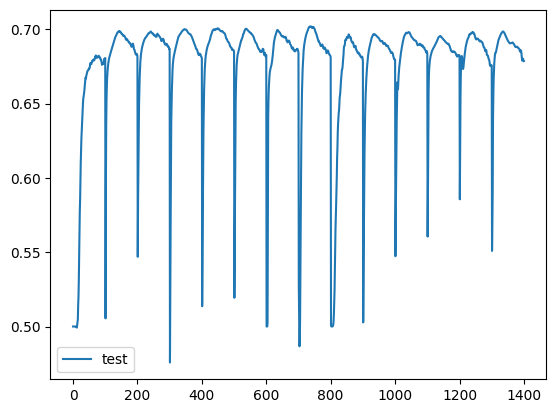

In [24]:
# plt.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')
# plt.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')
# plt.plot(np.arange(len(loss_list)), [0,]*101 + list(pseudo_loss_list), label='pseudo_loss')

# plt.plot(np.arange(len(loss_list)), val_metric_list, label='val')
plt.plot(np.arange(len(loss_list)), test_metric_list, label='test')

plt.legend()

In [25]:
loss_list[:,1][100:200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])